In [22]:
def sampleNo_to_seconds(sampleNo, sampling_frequency):
    time_in_seconds = sampleNo / sampling_frequency
    return time_in_seconds

def sampleNo_to_ms(sampleNo, sampling_frequency):
    return sampleNo_to_seconds(sampleNo, sampling_frequency)*1000

def seconds_to_sampleNo(time_in_seconds, sampling_frequency):
    sampleNo = time_in_seconds * sampling_frequency
    return sampleNo
    
#print(annotation.sample)
#print(sampleNo_to_ms(annotation.sample,250))

In [67]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np

# Choose database to plot from
#db_name = 'BIDMC-CHF' # ECG signal and annotations
db_name = 'CHF-RR' # annotations only
#db_name = 'NSR' # ECG signal and annotations
#db_name = 'NSR-RR' # annotations only
#db_name = 'FD' # ECG signal and annotations


#sample_numbers = np.arange(record.p_signal.shape[0])

#wfdb.rdann(record_name, extension, sampfrom=0, sampto=None, shift_samps=False, pn_dir=None, return_label_elements=['symbol'], summarize_labels=False)¶


time_start_plot_sec = 10 # choose starting point of plot, in seconds
seconds_to_plot = 10  # choose how many seconds of data to plot
#time_end_plot = 10 # choose end point of plot, in seconds
time_end_plot_sec = time_start_plot_sec + seconds_to_plot


#def prepare_db_info(file_path, 'ecg', time_start_plot_sec, time_end_plot_sec): ... return sampling_frequency, sample_start, sample_end, record, annotation, record_selected, annotation_selected, annotations_only


# BIDMC Congestive Heart Failure Database (BIDMC-CHF)
if db_name == 'BIDMC-CHF':
    data_dir_path = '../data/BIDMC-CHF_bidmc-congestive-heart-failure-database-1.0.0/files/'
    file = 'chf01'
    file_path = data_dir_path + file
    annotation_format = 'ecg' # format of the annotation files; file extension
    
    record = wfdb.rdrecord(file_path) # Load the record and annotation using WFDB
    annotation = wfdb.rdann(file_path, annotation_format) # Load the annotation (R-peak positions)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval
    #print(sample_start); print(sample_end)

    record = wfdb.rdrecord(file_path)
    record_selected = wfdb.rdrecord(file_path, sampfrom=sample_start, sampto=sample_end)
    annotation_selected = wfdb.rdann(file_path, annotation_format, sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval
    #print(annotation.sample)
    
    annotations_only = False

# Congestive Heart Failure RR Interval Database (CHF-RR)
if db_name == 'CHF-RR':
    data_dir_path = '../data/CHF-RR_congestive-heart-failure-rr-interval-database-1.0.0/'
    file = 'chf201'
    file_path = data_dir_path + file
    annotation_format = 'ecg'

    annotation = wfdb.rdann(file_path, annotation_format)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    print(sample_start); print(sample_end); print(sampling_frequency)
    print(1/sampling_frequency*(annotation.sample[:50]))
    annotation_selected = wfdb.rdann(file_path, annotation_format, sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval

    annotations_only = True

# MIT-BIH Normal Sinus Rhythm Database (NSR)
if db_name == 'NSR':
    data_dir_path = '../data/NSR_mit-bih-normal-sinus-rhythm-database-1.0.0/'
    file = '16272'
    file_path = data_dir_path + file
    annotation_format = 'atr'
    
    record = wfdb.rdrecord(file_path) # Load the record and annotation using WFDB
    annotation = wfdb.rdann(file_path, annotation_format) # Load the annotation (R-peak positions)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval
    #print(sample_start); print(sample_end)

    record = wfdb.rdrecord(file_path)
    record_selected = wfdb.rdrecord(file_path, sampfrom=sample_start, sampto=sample_end)
    annotation_selected = wfdb.rdann(file_path, annotation_format, sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval
    #print(annotation.sample)
    
    annotations_only = False

# Normal Sinus Rhythm RR Interval Database (NSR-RR)
if db_name == 'NSR-RR':
    data_dir_path = '../data/NSR-RR_normal-sinus-rhythm-rr-interval-database-1.0.0/'
    file = 'nsr001'
    file_path = data_dir_path + file
    annotation = wfdb.rdann(file_path, 'ecg', sampfrom=sample_start, sampto=sample_end)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    annotations_only = True

# Fantasia Database (FD)
if db_name == 'FD':
    data_dir_path = '../data/FD_fantasia-database-1.0.0/'
    file = 'f1o01'
    file_path = data_dir_path + file
    annotation_format = 'ecg'
    
    record = wfdb.rdrecord(file_path, sampfrom=sample_start, sampto=sample_end)
    annotation = wfdb.rdann(file_path, annotation_format, sampfrom=sample_start, sampto=sample_end)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    annotations_only = False


#time_in_seconds = sample_numbers / sampling_frequency # x axis in unit 'seconds'
#sample_start_plot = int(time_start_plot * sampling_frequency) # starting point of plot, sample number
#sample_end_plot = int(time_end_plot * sampling_frequency) # end point of plot, sample number

1280
2560
128
[ 5.8671875  6.625      7.4140625  8.1796875  8.9140625  9.671875
 10.4375    11.203125  11.9296875 12.65625   13.3984375 14.15625
 14.90625   15.640625  16.40625   17.203125  18.        18.7578125
 19.5078125 20.2734375 21.046875  21.796875  22.515625  23.1875
 23.8984375 24.625     25.3515625 26.0546875 26.7734375 27.5
 28.2265625 28.921875  29.578125  30.234375  30.875     31.546875
 32.2421875 32.9453125 33.6484375 34.390625  35.171875  35.984375
 36.796875  37.5546875 38.3359375 39.1171875 39.890625  40.6484375
 41.40625   42.203125 ]


In [3]:
if not annotations_only:
    print(type(record.fs))
    print(type(record.p_signal))
    print(record.p_signal[:10,:])
print(annotation.sample)

[     751      848      949 ... 10602971 10603061 10603153]


In [42]:
#print(annotation.fs)
#annotation.print_summary()
#wfdb.plot.plot_all_records(directory=data_dir_path) 
#wfdb.plot.plot_items(directory=data_dir_path) 

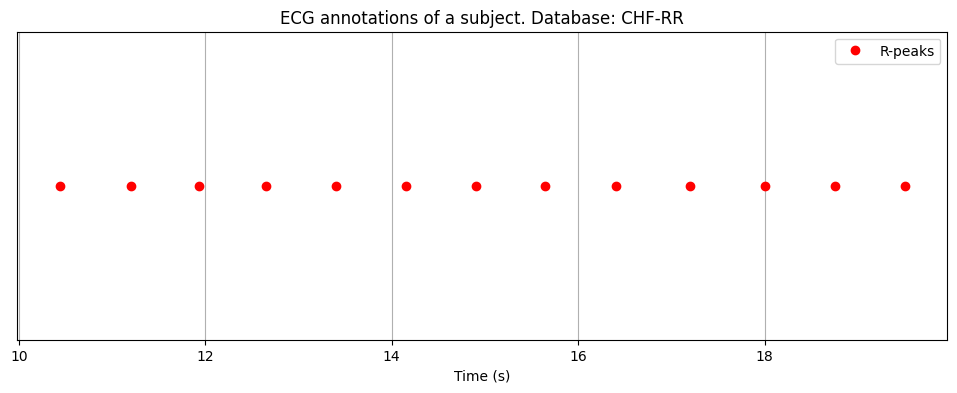

In [68]:
#sampling_frequency = record.fs # sampling frequency of heart data. (here: 250 data samples per second)
sampling_frequency = annotation.fs # sampling frequency of heart data. (here: 250 data samples per second)

'''
sample_numbers = np.arange(record.p_signal.shape[0])

time_in_seconds = sample_numbers / sampling_frequency # x axis in unit 'seconds'

time_start_plot = 2 # choose starting point of plot, in seconds
seconds_to_plot = 4  # choose how many seconds of data to plot
#time_end_plot = 10 # choose end point of plot, in seconds
time_end_plot = time_start_plot + seconds_to_plot

sample_start_plot = int(time_start_plot * sampling_frequency) # starting point of plot, sample number
sample_end_plot = int(time_end_plot * sampling_frequency) # end point of plot, sample number
'''

#samples_to_plot = int(seconds_to_plot * sampling_frequency)

# Plot the ECG signals
# x_start, x_stop = 0, 100
x_start, x_stop = sample_start, sample_end
x_list = np.arange(x_start, x_stop)


plt.figure(figsize=(12, 4))

#unit = 'sampleNo'
unit = 'seconds'
#unit = 'ms'

plot_ch2 = True
#plot_ch2 = False
lw = 0.5

if annotations_only:
    # Use zeros for y-values to plot the annotations as just markers on the x-axis
    y_values = np.zeros(len(annotation_selected.sample))
    
    if unit == 'sampleNo':
        plt.xlabel('Sample')
        
        # Overlay the R-peak annotations
        #annotations = annotation.sample  # locations of annotations
        #annotations_in_range = np.array([ann for ann in annotations if x_start <= ann < x_stop]) # keep only annotations in the chosen range

        #print(annotation_selected.sample.shape); print(annotation_selected.sample)
        plt.plot(annotation_selected.sample, y_values, 'ro', label='R-peaks')
    
    elif unit == 'seconds':
        #plt.plot(time_in_seconds[x_start:x_stop], signal_ch1_sub, lw=lw)
        plt.xlabel('Time (s)')
        annotations_selected_sec = sampleNo_to_seconds(annotation_selected.sample, sampling_frequency)
        plt.plot(annotations_selected_sec, y_values, 'ro', label='R-peaks')
        
    elif unit == 'ms':
        #plt.plot((time_in_seconds*1000)[x_start:x_stop], signal_ch1_sub, lw=lw)
        plt.xlabel('Time (ms)')
        #plt.plot((time_in_seconds*1000)[x_start:x_stop], signal_ch2_sub, lw=lw) if plot_ch2 else None
        # Annotations:
        #plt.plot(annotation.sample + x_start, signal_ch1_sub[annotation.sample + x_start], 'ro', label='R-peaks')
        #annotations = annotation.sample # locations of annotations
        #annotations_in_range = np.array([ann for ann in annotations if x_start <= ann < x_stop]) # keep only annotations in the chosen range

        #annotations_ms = sampleNo_to_ms(annotations_in_range, sampling_frequency) # locations of annotations, in time (ms)
        annotations_selected_ms = sampleNo_to_ms(annotation_selected.sample, sampling_frequency)
        plt.plot(annotations_selected_ms, y_values, 'ro', label='R-peaks')
        #plt.plot(annotations_ms, signal_ch1[annotations_in_range], 'ro', label='R-peaks')

    plt.title(f'ECG annotations of a subject. Database: {db_name}')
    plt.yticks([]) # remove y value labels
    plt.grid(True, axis='x')

else:
    signal_ch1 = record.p_signal[:, 0]
    signal_ch2 = record.p_signal[:, 1]
    
    #signal_ch1_sub = signal_ch1[x_start:x_stop]
    #signal_ch2_sub = signal_ch2[x_start:x_stop]
    print(f'Sampling frequency: {sampling_frequency}')
    
    if unit == 'sampleNo':
        print(x_list.shape); print(signal_ch1.shape); print(signal_ch1[x_list].shape)
        #print(x_list); print(signal_ch1)
        plt.plot(x_list, signal_ch1[x_list], lw=lw)  # Plot first channel of ECG data
        plt.xlabel('Sample')
        plt.plot(x_list, signal_ch2[x_list], lw=lw) if plot_ch2 else None
        
        # Overlay the R-peak annotations
        annotations = annotation_selected.sample  # locations of annotations
        #plt.plot(annotation.sample, signal_ch1[annotations], 'ro', label='R-peaks')
        plt.plot(annotations, signal_ch1[annotations], 'ro', label='R-peaks')
    
    elif unit == 'seconds':
        plt.plot(time_in_seconds[x_start:x_stop], signal_ch1, lw=lw)
        plt.xlabel('Time (s)')
        
    elif unit == 'ms':
        plt.plot((time_in_seconds*1000)[x_start:x_stop], signal_ch1, lw=lw)
        plt.xlabel('Time (ms)')
        plt.plot((time_in_seconds*1000)[x_start:x_stop], signal_ch2, lw=lw) if plot_ch2 else None
        # Annotations:
        #plt.plot(annotation.sample + x_start, signal_ch1_sub[annotation.sample + x_start], 'ro', label='R-peaks')
        annotations = annotation.sample # locations of annotations
        annotations_in_range = np.array([ann for ann in annotations if x_start <= ann < x_stop]) # keep only annotations in the chosen range
        #print(annotations_in_range); print(type(annotations_in_range))
        annotations_ms = sampleNo_to_ms(annotations_in_range, sampling_frequency) # locations of annotations, in time (ms)
        #print(annotations_ms); print(type(annotations_ms))
        plt.plot(annotations_ms, signal_ch1[annotations_in_range], 'ro', label='R-peaks')

    plt.title(f'ECG signal of a subject. Database: {db_name}')
    plt.ylabel('Amplitude')


plt.legend()
plt.show()